In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
loans = pd.read_csv(r'C:\Users\hp\Documents\Athengo\kiva_loans.csv')
theme_ids = pd.read_csv(r'C:\Users\hp\Documents\Athengo\loan_theme_ids.csv')
theme_region = pd.read_csv(r'C:\Users\hp\Documents\Athengo\loan_themes_by_region.csv')
mpi = pd.read_csv(r'C:\Users\hp\Documents\Athengo\kiva_mpi_region_locations.csv')

### 1. Previewing Our Datasets

In [157]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [158]:
theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [159]:
theme_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

In [160]:
mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


#### 1.1 Duplicates

In [161]:
print(f'loans - {loans.duplicated().any()}')
print(f'theme_ids - {theme_ids.duplicated().any()}')
print(f'theme_region - {theme_region.duplicated().any()}')
print(f'mpi - {mpi.duplicated().any()}')

loans - False
theme_ids - False
theme_region - False
mpi - True


In [162]:
# mpi[mpi.duplicated(keep=False)==True].to_clipboard()

In [163]:
# All duplicates all blanks so we can drop them 
mpi.drop_duplicates(inplace=True)

#### 1.2 Unique Identifiers

In [164]:
print(f"loans - id - {loans.duplicated('id').any()}")
print(f"theme_ids - id - {theme_ids.duplicated('id').any()}")
print(f"theme_region - Loan Theme ID - {theme_region.duplicated('Loan Theme ID').any()}")
print(f"mpi - LocationName - {mpi.duplicated('LocationName').any()}")

loans - id - False
theme_ids - id - False
theme_region - Loan Theme ID - True
mpi - LocationName - True


In [165]:
# theme_region[theme_region.duplicated('Loan Theme ID',keep=False)==True].to_clipboard()

In [166]:
print(f"theme_region - Loan Theme ID, LocationName - {theme_region.duplicated(['Loan Theme ID','LocationName']).any()}")

theme_region - Loan Theme ID, LocationName - False


In [167]:
# mpi[mpi.duplicated('LocationName',keep=False)==True].to_clipboard()

In [168]:
# Again these are blank Locations with no mpi so we can drop 
mpi.dropna(subset='LocationName',inplace=True)
print(f"mpi - LocationName - {mpi.duplicated('LocationName').any()}")

mpi - LocationName - False


#### 1.2 Merging 

In [169]:
# print(loans.shape)
# df1 = pd.merge(loans,theme_ids,on='id',how='left')
# print(df1.shape)

In [170]:
# print(theme_region.shape)
# df2 = pd.merge(theme_region,mpi[['LocationName','MPI']],left_on='mpi_region',right_on='LocationName',how='left')
# print(df2.shape)

In [171]:
# df2['MPI'].isna().value_counts()

In [172]:
# df2[df2['MPI'].isna()==True].to_clipboard()

In [173]:
# df2.columns

In [174]:
# print(df1.shape)
# data = pd.merge(df1,df2[['Loan Theme ID','Partner ID','Field Partner Name','country','region','MPI']],
#                 on=['Loan Theme ID','Partner ID','country','region'],how='left')
# print(data.shape)

In [175]:
# data['Field Partner Name'].isna().value_counts()

In [176]:
# data[data['Field Partner Name'].isna()==True]

### 2. Analysis

#### 2.1 Net Disbursment
This is the difference between the funded amount and the loaned amount

In [177]:
partners = theme_region.drop_duplicates('Partner ID')[['Partner ID','Field Partner Name']]

In [178]:
print(loans.shape)
loans1 = pd.merge(loans,partners,left_on='partner_id',right_on='Partner ID',how='left')
print(loans1.shape)

(671205, 20)
(671205, 22)


In [179]:
# loans1[loans1['Field Partner Name'].isna()==True][['partner_id','Partner ID','Field Partner Name']]

In [180]:
loans1['Field Partner Name'] = loans1['Field Partner Name'].fillna(loans1['partner_id'])

In [181]:
loans1['net_disbursment'] = loans1['funded_amount'] - loans1['loan_amount']

* If the funded amount equals the loan amount then the loan is fully utilized 
* If the funded amount is more than the loan amount then the loan is under utilized i.e money is there but the field agent has not disbursed all of it to the borrower 
* If the funded amount is less than the loan amount then the loan is over utilized i.e the field agent has disbursed more money to the borrower than the funds available

In [182]:
loans1['utilization'] = np.where(loans1['net_disbursment']>0,'under utilized',
         np.where(loans1['net_disbursment']<0,'over utilized','fully utilized'))

In [183]:
loans1['utilization'].value_counts()

fully utilized    622875
over utilized      48328
under utilized         2
Name: utilization, dtype: int64

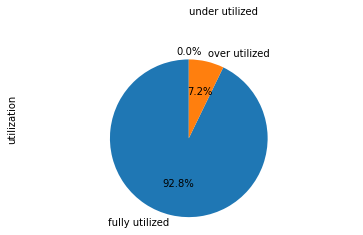

In [184]:
loans1['utilization'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0, 0, 0.5))
plt.axis('equal')
plt.show()

##### 2.1.1 Funding Gap
This is the deficit in funding. This will need to be plugged because the money has already been dispersed to the borrower by the field agent.

In [185]:
over_utilized= loans1[loans1['utilization']=='over utilized']

In [186]:
over_utilized['net_disbursment'].sum()

-37857760.0

Kiva has a funding gap of about 37.85 M 

In [187]:
over_utilized.to_csv('over_utilized.csv')

In [188]:
# Countries with the largest funding gap
over_utilized.groupby('country')['net_disbursment'].sum().nsmallest(5)

country
United States   -8337835.0
El Salvador     -3245925.0
Kenya           -2285895.0
Colombia        -1941825.0
Armenia         -1729125.0
Name: net_disbursment, dtype: float64

In [189]:
# Partners with the largest funding gap
over_utilized.groupby('Field Partner Name')['net_disbursment'].sum().nsmallest(5)

Field Partner Name
Interactuar               -1582050.0
CrediCampo                -1538350.0
Apoyo Integral            -1152150.0
SEF International         -1033450.0
Urwego Opportunity Bank    -765075.0
Name: net_disbursment, dtype: float64

##### 2.1.2 Absorption Rate
This is the percentage of funds available that have been disbursed to the borrower by the field agent

In [190]:
fully_funded= loans1[loans1['utilization'].isin(['under utilized','fully utilized'])]

In [191]:
(sum(fully_funded['loan_amount']) / sum(fully_funded['funded_amount']))*100

99.99991453550903

Kiva has a really absorption rate meaning the partners are doing a great job in getting the money to the people who need it

In [192]:
fully_funded[fully_funded['utilization']=='under utilized'][['id','funded_amount','loan_amount','net_disbursment','country','Field Partner Name']]

,id,funded_amount,loan_amount,net_disbursment,country,Field Partner Name
277188,924149,425.0,400.0,25.0,Mozambique,Hluvuku-Adsema
338159,985199,3400.0,3000.0,400.0,Armenia,SEF International


These are the two field partners that have not fully disbursed 425 shillings. Kiva will have to follow up and find out the reasons why

#### 3.1 Reporting Time
This is the amount of time taken by our partners to report that the money has been disbursed to the borrower.
It is important that we know when borrowers have received the money they require as soon as possible. This will help us make decisions faster and keep our investors informed of how their funds are being used.

**NB: I am making an assumption that the field partners disperse the loan first and then post the loan on Kiva**

In [193]:
loans1['dibursment_date'] = pd.to_datetime(pd.to_datetime(loans1['disbursed_time']).dt.date,yearfirst=True)
loans1['reporting_date'] = pd.to_datetime(pd.to_datetime(loans1['posted_time']).dt.date,yearfirst=True)
loans1['reporting_time'] = (loans1['reporting_date'] - loans1['dibursment_date']).dt.days

In [194]:
# Removing records where the loan was posted before it was disbursed
loans2 = loans1[loans1['reporting_time']>=0]

##### 3.1.1 Average Time Taken

In [195]:
loans2['reporting_time'].mean()

17.295465946671353

Our partners take an average of 17 days to post loans that have been disbursed on Kiva

In [196]:
# Partners that take the most time to post loans
loans1.groupby('Field Partner Name')['reporting_time'].mean().nlargest(5)

Field Partner Name
FundaciÍ_n Paraguaya    30.917332
Building Markets        30.000000
MCE Social Capital      30.000000
282.0                   29.855263
376.0                   29.833333
Name: reporting_time, dtype: float64

One problem with using the average is that it is affected by outliers so a field agent may have posted many loans on Kiva in a day but posted one loan in 30 days thus making them look worse than they actually are

##### 3.1.2 Percentage Reported Within the Target Period
We can set a target to our partners that they should post loans on Kiva within x days of disbursing them and see what percentage of loans posted meet that target.

I will use 7 days in my case.

In [197]:
loans2['within_target'] = np.where(loans2['reporting_time']<=7,'Yes','No')

C:\Users\hp\AppData\Local\Temp\ipykernel_16024\2769514661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans2['within_target'] = np.where(loans2['reporting_time']<=7,'Yes','No')


In [198]:
loans2['within_target'].value_counts()

No     488503
Yes    137427
Name: within_target, dtype: int64

In [199]:
loans2['within_target'].value_counts(normalize=True) * 100

No     78.04435
Yes    21.95565
Name: within_target, dtype: float64

Only 21% of loans are posted within 7 days of being disbursed

In [200]:
prtnrs_tm = pd.pivot_table(loans2,index='Field Partner Name',values='id',columns='within_target',aggfunc='count',margins=True)
prtnrs_tm['target_achvd'] = (prtnrs_tm['Yes'] / prtnrs_tm['All']) * 100

In [201]:
# Partners that take the most time posting loans
prtnrs_tm['target_achvd'].nsmallest(5)

Field Partner Name
FundaciÍ_n Paraguaya    0.075611
Vitas - Lebanon         0.110988
Interactuar             0.298981
Kepler                  0.354610
VisionFund Cambodia     0.711809
Name: target_achvd, dtype: float64

In [202]:
# Partners that take the least time posting loans
prtnrs_tm['target_achvd'].nlargest(5)

Field Partner Name
277.0    100.0
299.0    100.0
323.0    100.0
344.0    100.0
409.0    100.0
Name: target_achvd, dtype: float64

Disadvantage with this method is that our partners may have to post loans on Kiva almost everyday so that a loan does not take more than 7 days to be posted and they might not have enough time to do this

##### 3.1.2 Percentage Reported Before CutOff
We can come to an agreement with our partners that they should post loans disbursed in  a certain period before a given date e.g every Friday and calculate what percentage of loans are posted before the cutoff. 

We agree with each partner a day that suits them weekly but in my case I have chosen Friday

In [203]:
day_of_week = loans2['dibursment_date'].dt.dayofweek
loans2['cutoff'] = loans2['dibursment_date'] + pd.to_timedelta((4 - day_of_week) % 7 + (day_of_week == 4), unit='D')

C:\Users\hp\AppData\Local\Temp\ipykernel_16024\1841135154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans2['cutoff'] = loans2['dibursment_date'] + pd.to_timedelta((4 - day_of_week) % 7 + (day_of_week == 4), unit='D')


In [204]:
loans2['before_cutoff'] = loans2['reporting_date'] <= loans2['cutoff']

C:\Users\hp\AppData\Local\Temp\ipykernel_16024\2213568777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans2['before_cutoff'] = loans2['reporting_date'] <= loans2['cutoff']


In [205]:
loans2['before_cutoff'].value_counts()

False    572079
True      53851
Name: before_cutoff, dtype: int64

In [206]:
loans2['within_target'].value_counts(normalize=True) * 100

No     78.04435
Yes    21.95565
Name: within_target, dtype: float64

Only 21% of loans are posted on Kiva before the cutoff of every Friday

In [207]:
pd.pivot_table(loans2,index='Field Partner Name',values='id',columns='before_cutoff',aggfunc='count',margins=True)

before_cutoff,False,True,All
Field Partner Name,,,
71.0,332.0,1.0,333
74.0,1007.0,80.0,1087
78.0,3644.0,164.0,3808
85.0,261.0,22.0,283
98.0,1253.0,84.0,1337
...,...,...,...
iDE Cambodia,14528.0,1290.0,15818
iSchool Zambia,3.0,4.0,7
iSmart Kenya,NaN,7.0,7


In [208]:
prtnrs_tm1 = pd.pivot_table(loans2,index='Field Partner Name',values='id',columns='before_cutoff',aggfunc='count',margins=True)
prtnrs_tm1['cutoff_achvd'] = (prtnrs_tm1[True] / prtnrs_tm1['All']) * 100

In [209]:
# Partners that take the most time posting loans
prtnrs_tm1['cutoff_achvd'].nsmallest(5)

Field Partner Name
FundaciÍ_n Paraguaya        0.058809
Interactuar                 0.073220
BRAC Uganda                 0.073774
Turame Community Finance    0.113895
VisionFund Cambodia         0.237270
Name: cutoff_achvd, dtype: float64

In [210]:
# Partners that take the least time posting loans
prtnrs_tm1['cutoff_achvd'].nlargest(5)

Field Partner Name
323.0               100.0
Fonkoze - ZafÍÎn    100.0
Novica              100.0
One Degree Solar    100.0
UpEnergy            100.0
Name: cutoff_achvd, dtype: float64

#### 3.1 Needy Coverage
This is a measure of how well we are providing help to the areas that need it the most

In [211]:
mpi_indx = mpi.groupby('country',as_index=False)['MPI'].mean()

In [212]:
mpi_indx.head()

,country,MPI
0,Afghanistan,0.309853
1,Bangladesh,0.208286
2,Belize,0.020143
3,Benin,0.320333
4,Bhutan,0.123474


In [213]:
loan_amt = loans.groupby('country',as_index=False)['loan_amount'].sum()

In [214]:
loan_amt.head()

,country,loan_amount
0,Afghanistan,14000.0
1,Albania,2666500.0
2,Armenia,12915400.0
3,Azerbaijan,2888700.0
4,Belize,114025.0


Using the average MPI of a country we created our own index of how needy a country is so the higher the index the more needy that country is.
 
Assuming our entrire loan book was to be distributred equally based on need then each country would require our index * total amount.

We then compared the amount actually loaned per country with the required funding to see if a country is underserved or not and by how much.

In [215]:
coverage = pd.merge(loan_amt,mpi_indx,on='country',how='right')
coverage['loan_amount'] = coverage['loan_amount'].fillna(0)
coverage['index'] = coverage['MPI'] / coverage['MPI'].sum()
coverage['funding_need'] = (coverage['index'] * coverage['loan_amount'].sum()).round(0)
coverage['funding_deficit'] = coverage['loan_amount'] - coverage['funding_need']
coverage['%funding_deficit'] = ((coverage['loan_amount'] / coverage['funding_need']) * 100).round(2)
coverage['funding'] = np.where(coverage['funding_deficit']>0,'over funded',
                        np.where(coverage['funding_deficit']<0,'under funded','fully funded'))

In [216]:
coverage['funding'].value_counts()

under funded    55
over funded     23
Name: funding, dtype: int64

In [217]:
coverage['funding'].value_counts(normalize=True) * 100

under funded    70.512821
over funded     29.487179
Name: funding, dtype: float64

70% of countries are receiving less money than what they require

In [218]:
# Countries that are under funded
coverage.sort_values('%funding_deficit').head(10)

,country,loan_amount,MPI,index,funding_need,funding_deficit,%funding_deficit,funding
66,Syrian Arab Republic,0.0,0.014643,0.000890,320100.0,-320100.0,0.0,under funded
24,Ethiopia,0.0,0.492273,0.029916,10761320.0,-10761320.0,0.0,under funded
68,"Tanzania, United Republic of",0.0,0.266333,0.016185,5822176.0,-5822176.0,0.0,under funded
53,Niger,0.0,0.543375,0.033021,11878441.0,-11878441.0,0.0,under funded
65,Swaziland,0.0,0.073500,0.004467,1606746.0,-1606746.0,0.0,under funded
71,Trinidad and Tobago,0.0,0.020800,0.001264,454698.0,-454698.0,0.0,under funded
19,Djibouti,0.0,0.169500,0.010301,3705352.0,-3705352.0,0.0,under funded
18,Cote d'Ivoire,0.0,0.348000,0.021148,7607449.0,-7607449.0,0.0,under funded
17,"Congo, Republic of",0.0,0.265583,0.016140,5805780.0,-5805780.0,0.0,under funded
16,"Congo, Democratic Republic of the",0.0,0.395636,0.024043,8648803.0,-8648803.0,0.0,under funded


In [219]:
# Countries that are over funded
coverage.sort_values('%funding_deficit',ascending=False).head(10)

,country,loan_amount,MPI,index,funding_need,funding_deficit,%funding_deficit,funding
57,Philippines,55342225.0,0.061824,0.003757,1351492.0,53990733.0,4094.90,over funded
23,El Salvador,26603650.0,0.031500,0.001914,688605.0,25915045.0,3863.41,over funded
21,Ecuador,15000275.0,0.018250,0.001109,398954.0,14601321.0,3759.90,over funded
37,Jordan,4672150.0,0.006333,0.000385,138450.0,4533700.0,3374.61,over funded
56,Peru,30867400.0,0.053080,0.003226,1160355.0,29707045.0,2660.17,over funded
14,Colombia,14415600.0,0.025125,0.001527,549245.0,13866355.0,2624.62,over funded
67,Tajikistan,15030350.0,0.046600,0.002832,1018699.0,14011651.0,1475.45,over funded
38,Kenya,34534300.0,0.209375,0.012724,4577039.0,29957261.0,754.51,over funded
52,Nicaragua,10601950.0,0.083588,0.005080,1827279.0,8774671.0,580.20,over funded
9,Cambodia,19872700.0,0.164053,0.009970,3586270.0,16286430.0,554.13,over funded
